<a href="https://colab.research.google.com/github/sanjithrana/AI-ML-TASKS-1/blob/main/AI_%26_ML_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing pakages

In [85]:
#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import missingno as msno


# Load the dataset
# Make sure to have 'titanic.csv' in the same directory or provide the full path
data = pd.read_csv('/content/Titanic-Dataset (1).csv')

#Data cleaning

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
data.shape

(891, 12)

In [88]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [89]:
data.duplicated().sum()

np.int64(0)

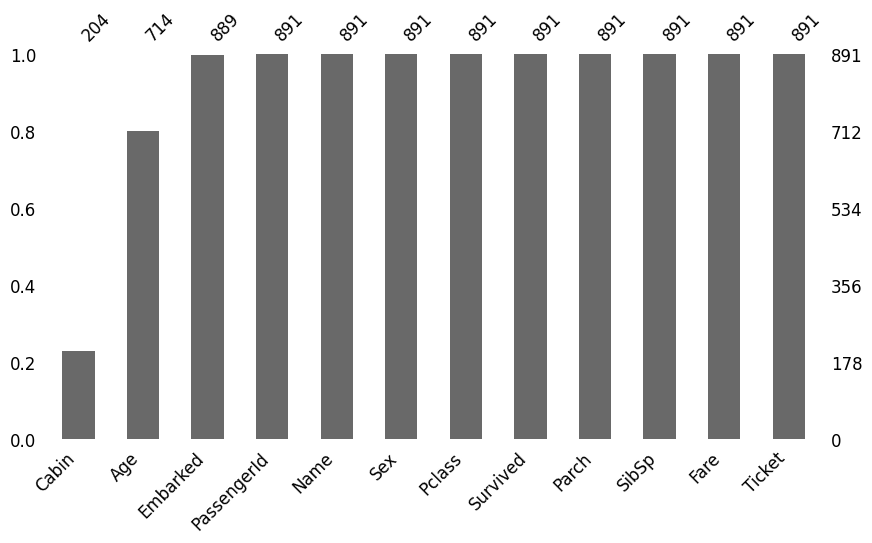

In [90]:
msno.bar(data, sort="ascending", figsize=(10,5), fontsize=12)
plt.show()

#handling nulls

In [91]:
data['Age'].fillna(data['Age'].median(), inplace=True)

/tmp/ipython-input-913469570.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [92]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [93]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-4247733614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [94]:
# Drop the 'Cabin' column due to too many missing values
data.drop('Cabin', axis=1, inplace=True)

In [95]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [96]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#encoding

In [97]:
#2. Drop columns that are not useful for modeling
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [98]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [100]:
# 3. Convert Categorical Features to Numerical (Encoding)
# Convert 'Sex' and 'Embarked' using one-hot encoding or get_dummies
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


#feature scaling.

<Axes: xlabel='Sex_male'>

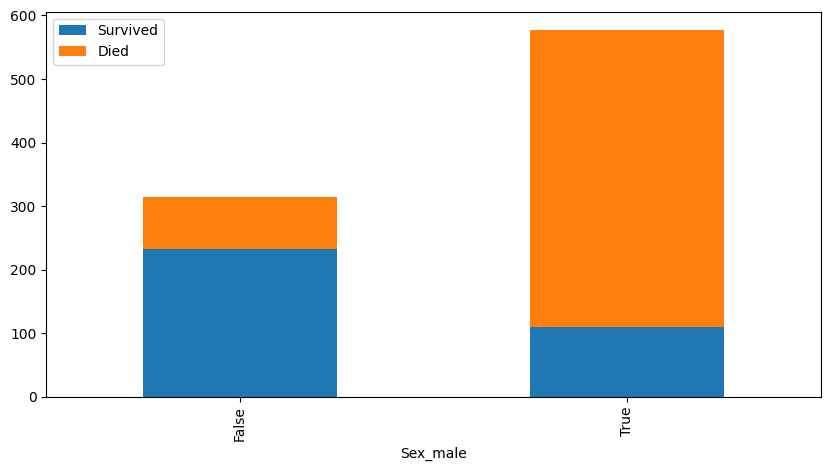

In [102]:
#Visualizing survivals based on gender
data['Died'] = 1 - data['Survived']
data.groupby('Sex_male').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

Text(0.5, 1.0, 'Boxplot of Age')

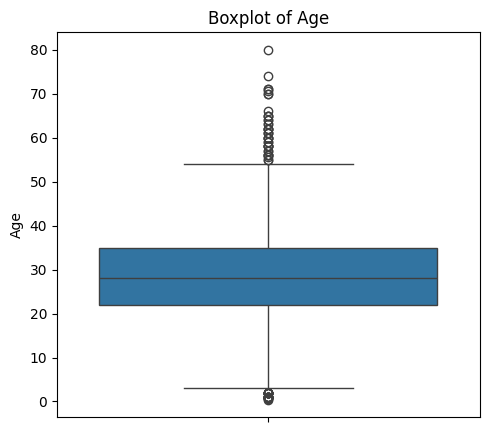

In [103]:
#4. Detect and Visualize Outliers
# Use boxplots to visualize outliers in 'Age'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')


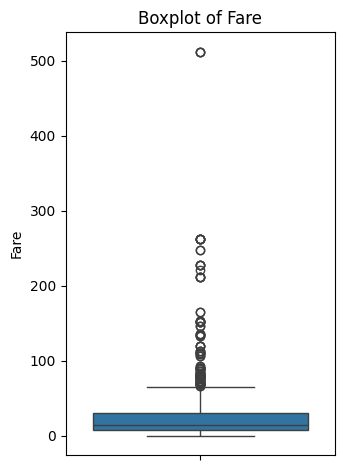

In [104]:
 # Use boxplots to visualize outliers in 'Age'
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()


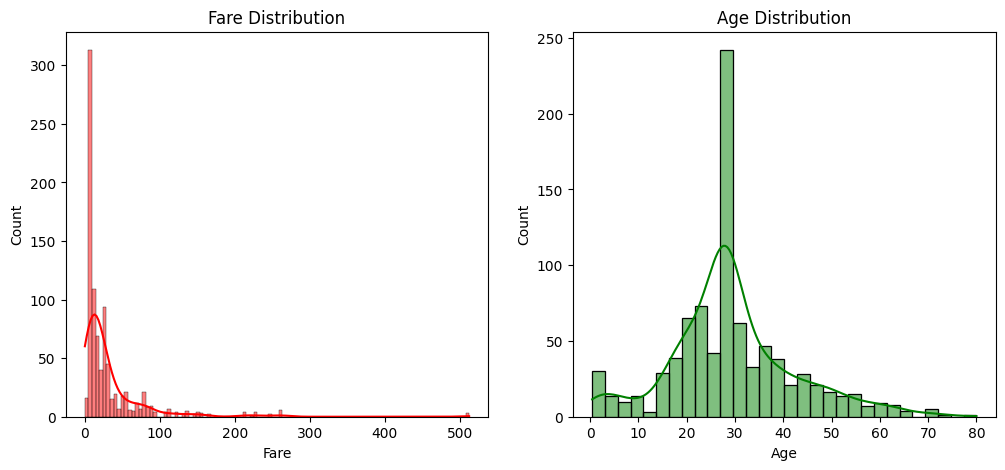

In [105]:
ig,ax=plt.subplots(1,2,figsize=(12,5))

ax[0].set_title("Fare Distribution")
ax[1].set_title("Age Distribution")
sns.histplot(data["Fare"],ax=ax[0],kde=True,color="red")
sns.histplot(data["Age"],ax=ax[1],kde=True,color="green")
plt.show()

In [106]:
# 5. Remove Outliers (using IQR method for 'Fare')
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [107]:
# Filter out the outliers
data_no_outliers = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

print(f"\nOriginal data shape: {data.shape}")
print(f"Data shape after removing outliers from 'Fare': {data_no_outliers.shape}")



Original data shape: (891, 10)
Data shape after removing outliers from 'Fare': (775, 10)


In [108]:
# 6. Normalize/Standardize Numerical Features
from sklearn.preprocessing import StandardScaler

# We'll use the data with outliers removed for scaling
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
data_no_outliers[numerical_cols] = scaler.fit_transform(data_no_outliers[numerical_cols])


print(data_no_outliers.head())

   Survived  Pclass       Age     SibSp     Parch      Fare  Sex_male  \
0         0       3 -0.528321  0.625606 -0.433718 -0.779117      True   
2         1       3 -0.215182 -0.486423 -0.433718 -0.729373     False   
3         1       1  0.489381  0.625606 -0.433718  2.599828     False   
4         0       3  0.489381 -0.486423 -0.433718 -0.720161      True   
5         0       3 -0.058613 -0.486423 -0.433718 -0.690071      True   

   Embarked_Q  Embarked_S  Died  
0       False        True     1  
2       False        True     0  
3       False        True     0  
4       False        True     1  
5        True       False     1  


/tmp/ipython-input-1651577759.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers[numerical_cols] = scaler.fit_transform(data_no_outliers[numerical_cols])
